Этап 1: знакомство с данными и EDA (Exploratory Data Analysis)

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Подготовка и загрузка данных

In [6]:
ratings = pd.read_csv('data/ratings.csv')
books = pd.read_csv('data/books.csv')
tags = pd.read_csv('data/tags.csv')
book_tags = pd.read_csv('data/book_tags.csv')

display(ratings.head())
display(books.head())
display(tags.head())
display(book_tags.head())

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Посмотрим распределение оценок

/tmp/ipykernel_6267/1087872357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


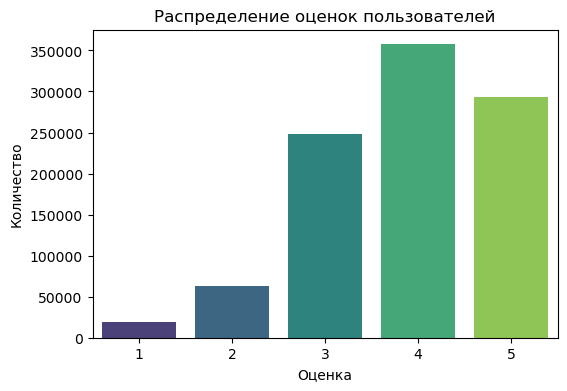

rating
4    0.364007
5    0.298405
3    0.253243
2    0.064406
1    0.019939
Name: proportion, dtype: float64

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

display(ratings['rating'].value_counts(normalize=True))


Из графика видим, что есть сильное смещение в сторону положительных оценок, что типично для сырого рекомендательного датасета.

Исследуем активность пользователей

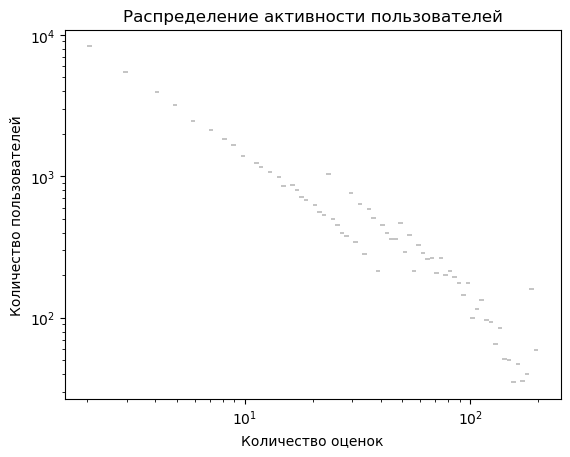

count    53424.000000
mean        18.376685
std         26.268690
min          2.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: count, dtype: float64


In [9]:
user_activity = ratings['user_id'].value_counts()
sns.histplot(user_activity, bins=100, log_scale=(True, True))
plt.title('Распределение активности пользователей')
plt.xlabel('Количество оценок')
plt.ylabel('Количество пользователей')
plt.show()

print(user_activity.describe())

Распределение активности очень неравномерное.

Большинство пользователей поставили мало оценок (от 2 до 10), и только малая часть — де.

Это указывает на разреженность данных и проблему холодного старта.

Выявим какие книги получают больше всего оцценок.

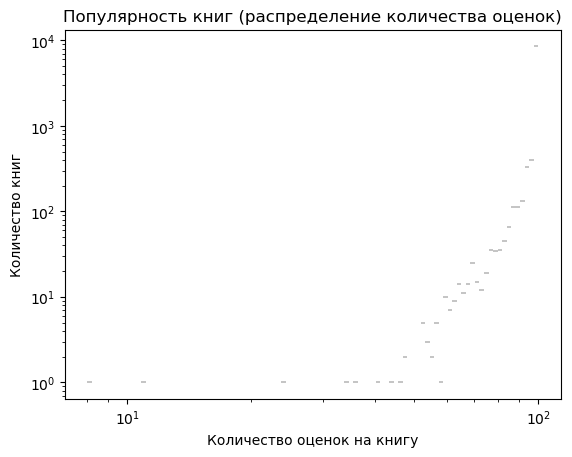

,title,authors
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
778,A Fine Balance,Rohinton Mistry
5628,Paradise,Toni Morrison


In [10]:
book_popularity = ratings['book_id'].value_counts()
sns.histplot(book_popularity, bins=100, log_scale=(True, True))
plt.title('Популярность книг (распределение количества оценок)')
plt.xlabel('Количество оценок на книгу')
plt.ylabel('Количество книг')
plt.show()

top_books = book_popularity.head(10)
books.loc[books['book_id'].isin(top_books.index), ['title', 'authors']]


Большинство книг имеют мало оценок (от 1 до 20), а малая часть — сотни или тысячи, что означает неравномерное распределение популярности.

Распределение указывает, что интерес пользователей сосредоточен на небольшой группе популярных книг (например, “Harry Potter and the Half-Blood Prince”), а остальные составляют длинный хвост малопопулярных произведений. Это указывает на наличие эффекта "длинного хвоста". 

Алгоритмы, основанные на коллаборативной фильтрации, могут переоценивать популярные книги, потому что по ним больше данных для обучения. В то же время редкие книги (в хвосте распределения) плохо представлены в данных, и модели будут их рекомендовать реже. Указанное свидительствует о смещении популярности.


/tmp/ipykernel_6267/4206490785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_tags.index, x=top_tags.values, palette='mako')


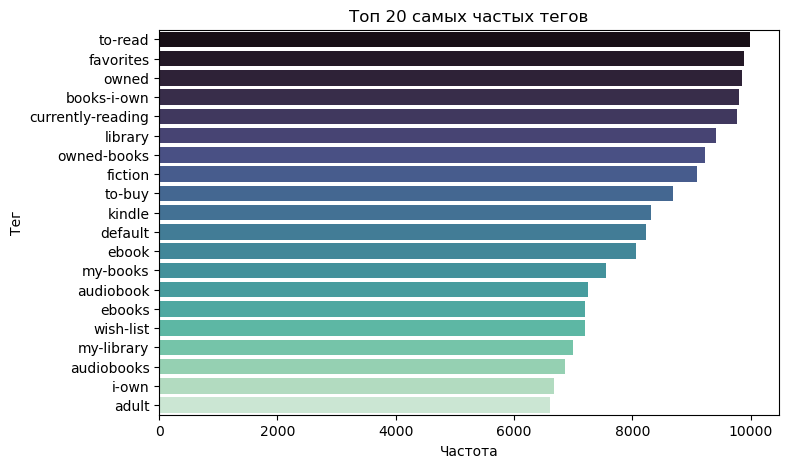

In [12]:
tagged = book_tags.merge(tags, on='tag_id')
top_tags = tagged['tag_name'].value_counts().head(20)

plt.figure(figsize=(8,5))
sns.barplot(y=top_tags.index, x=top_tags.values, palette='mako')
plt.title('Топ 20 самых частых тегов')
plt.xlabel('Частота')
plt.ylabel('Тег')
plt.show()